In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [39]:
F = open("10.conv.weight_save.txt",'r')
inArray = F.read()
inArray = inArray.split(",")
a = np.zeros([len(inArray)/2,2])
i = 0
for i in range(len(inArray)):
    inArray[i] = inArray[i].strip()
    inArray[i] = inArray[i].strip('(')
    inArray[i] = inArray[i].strip(')')
    inArray[i] = float(inArray[i])
    a[i/2,i%2] = inArray[i]
print(a.shape)

(701, 2)


In [4]:
a =  np.load("3.conv.weight_save.npy")
print(a.shape)

(29581, 2)


In [11]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[1])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [12]:
c = b.swapaxes(1,3)
c = (c>0.01) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[29581.]]


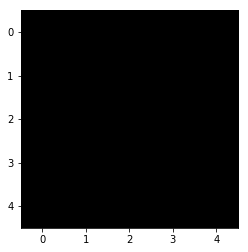

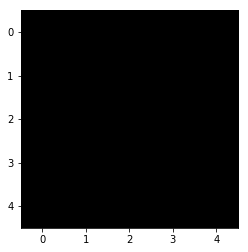

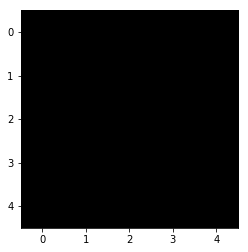

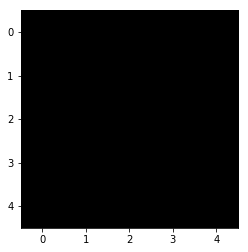

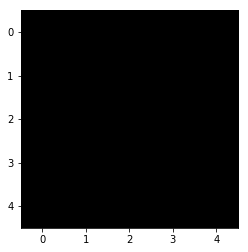

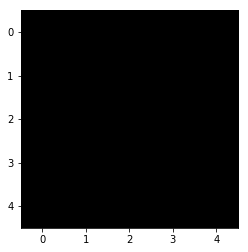

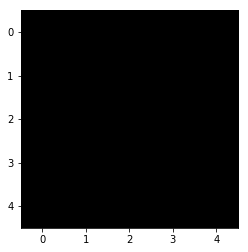

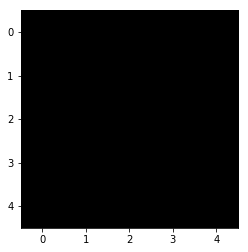

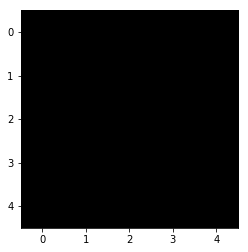

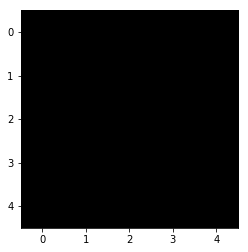

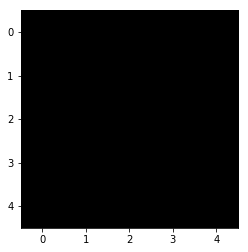

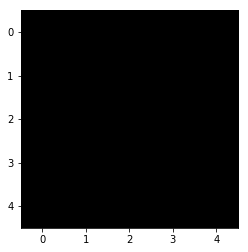

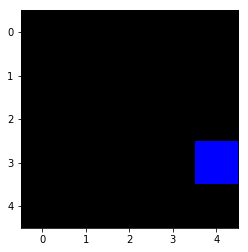

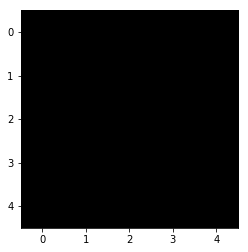

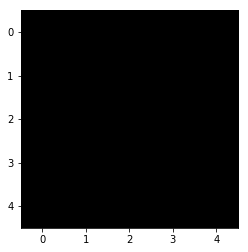

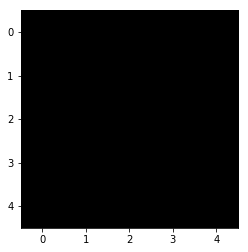

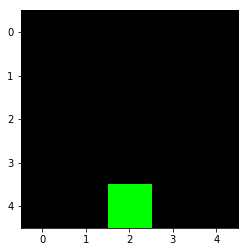

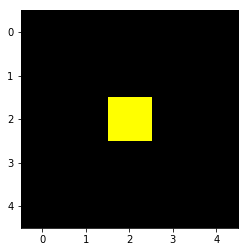

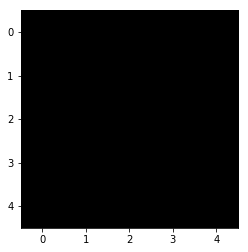

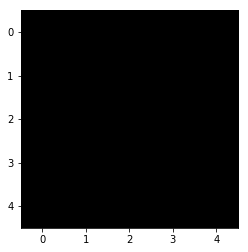

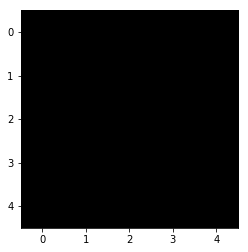

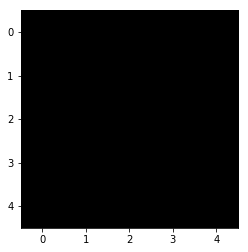

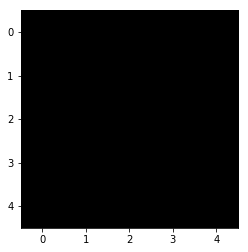

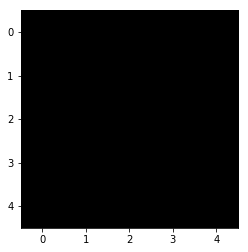

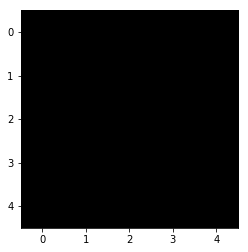

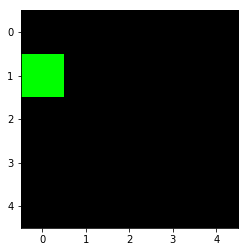

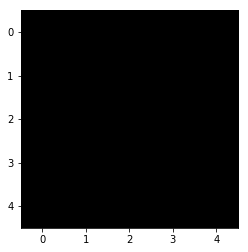

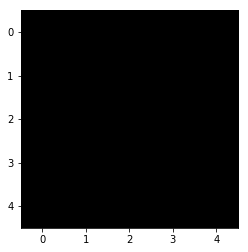

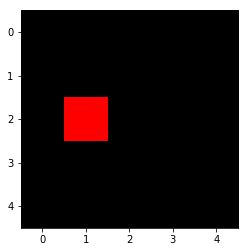

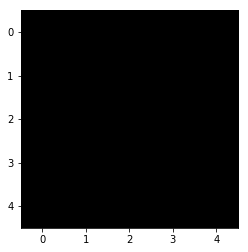

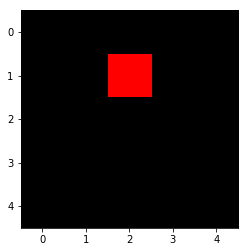

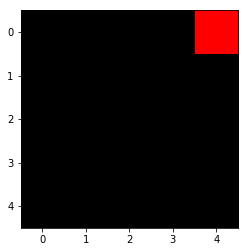

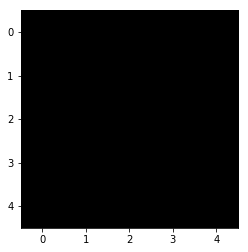

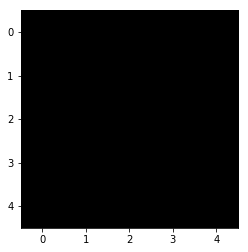

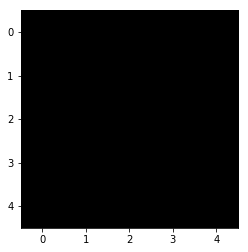

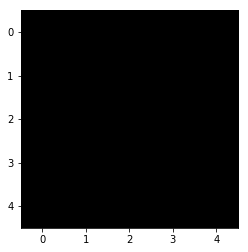

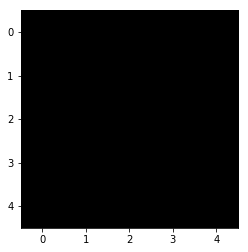

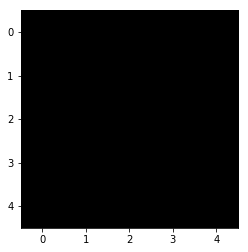

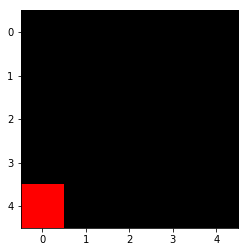

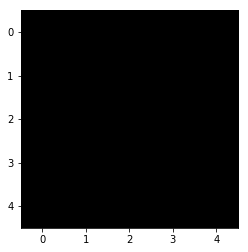

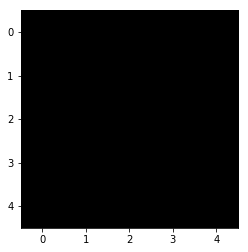

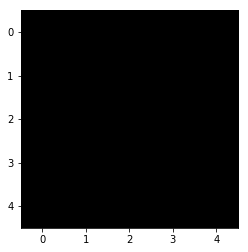

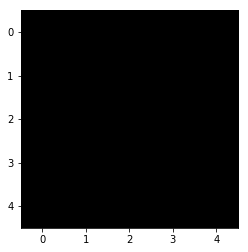

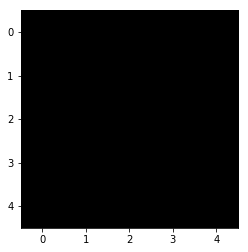

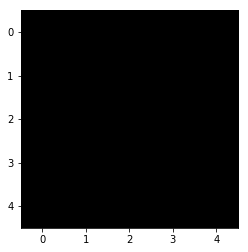

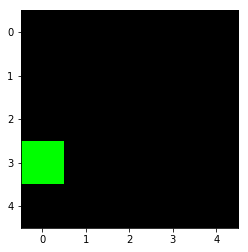

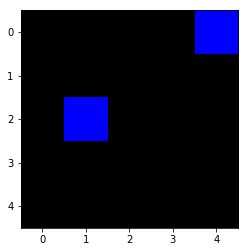

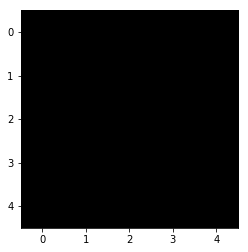

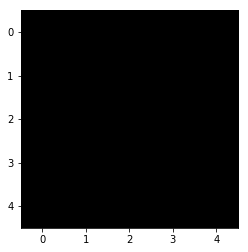

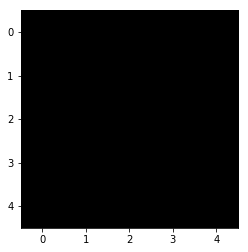

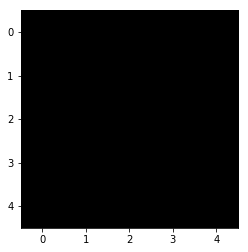

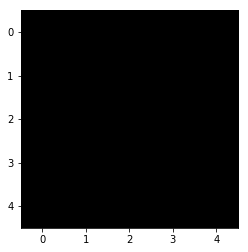

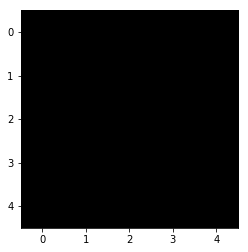

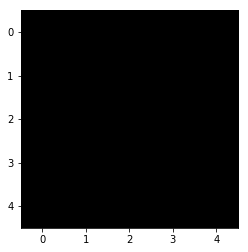

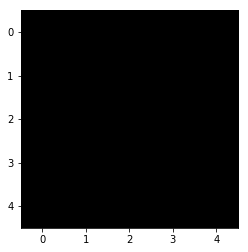

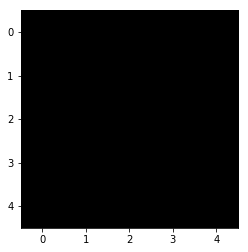

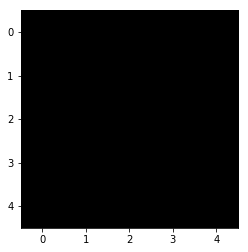

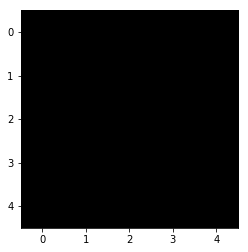

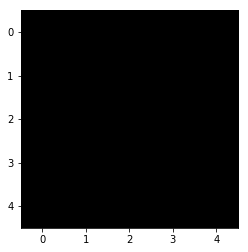

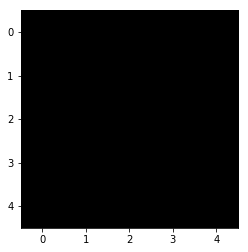

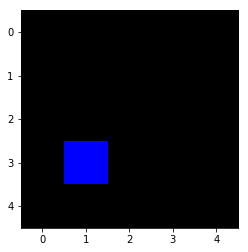

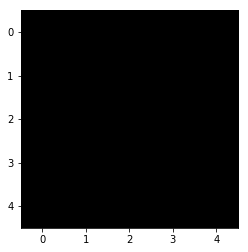

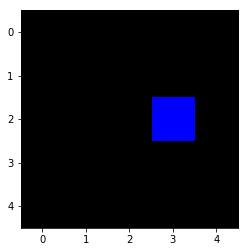

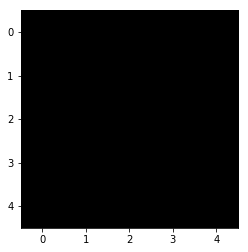

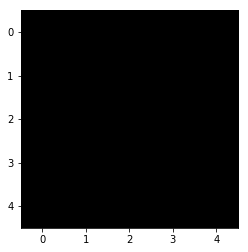

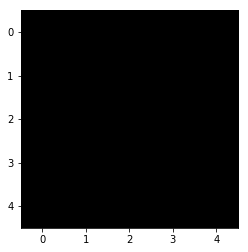

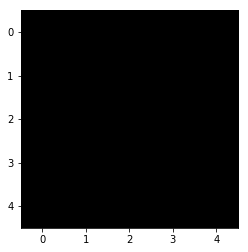

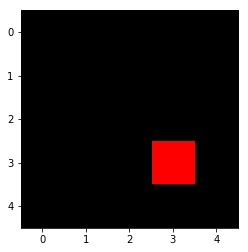

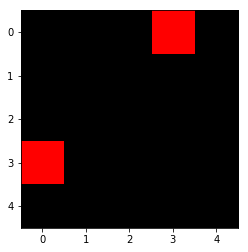

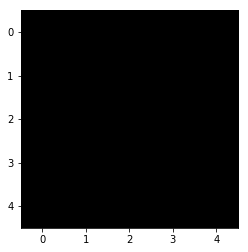

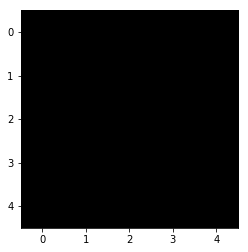

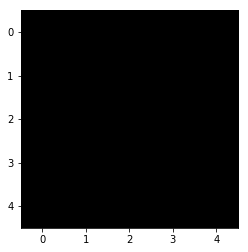

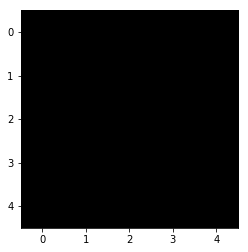

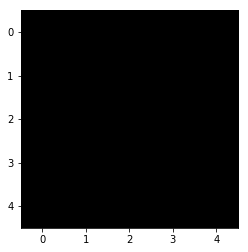

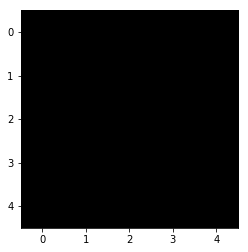

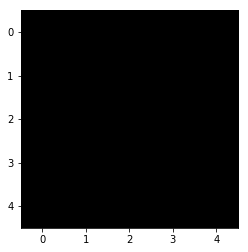

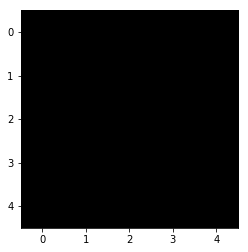

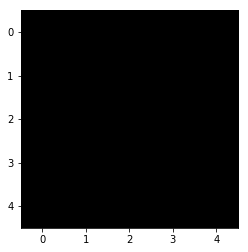

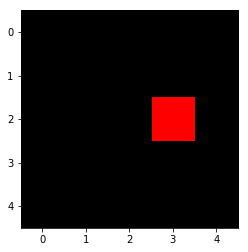

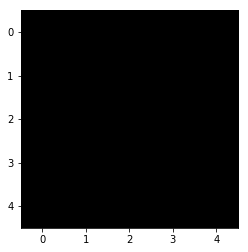

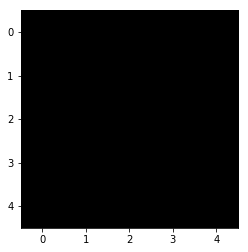

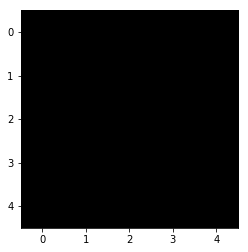

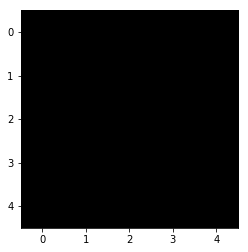

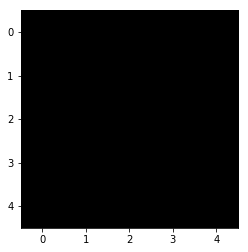

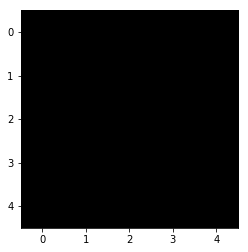

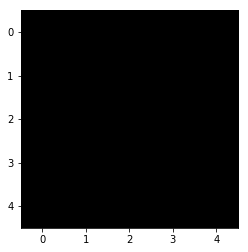

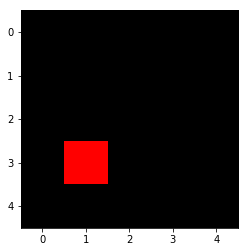

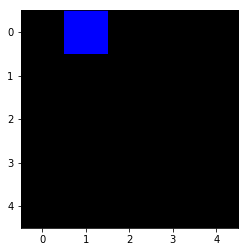

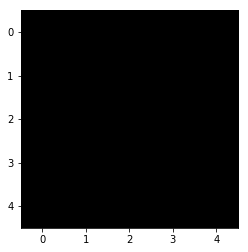

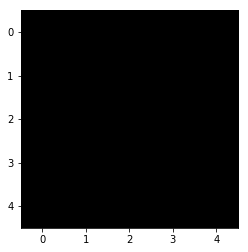

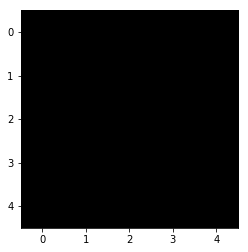

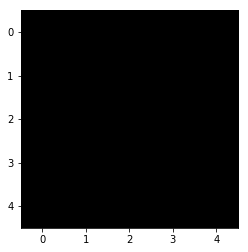

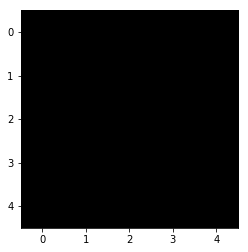

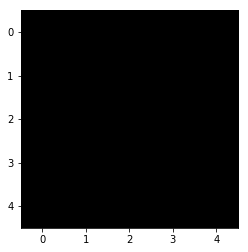

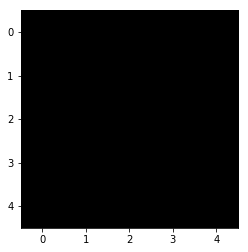

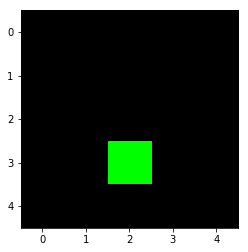

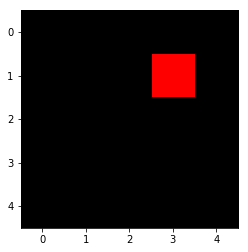

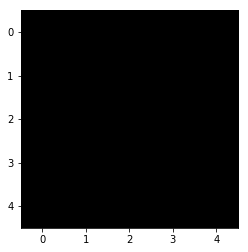

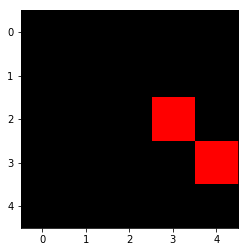

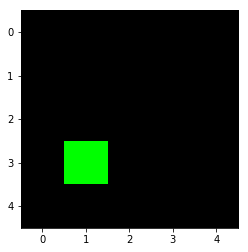

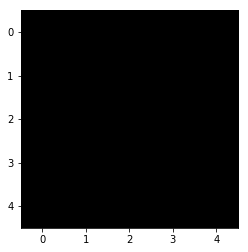

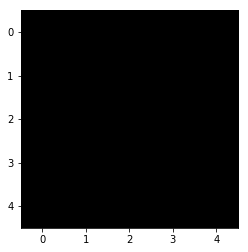

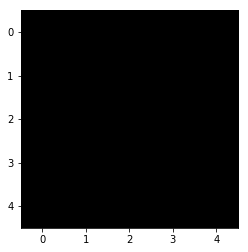

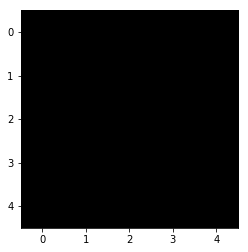

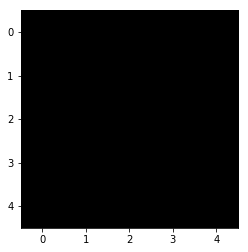

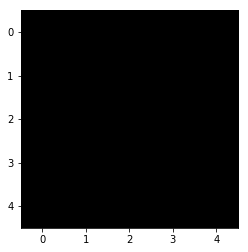

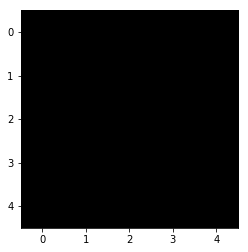

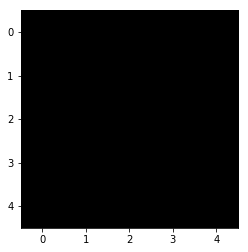

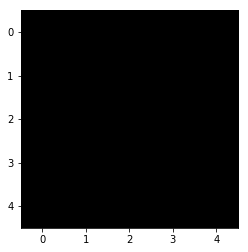

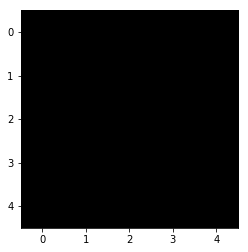

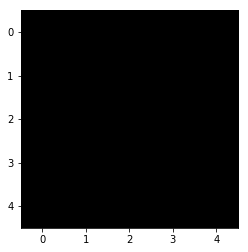

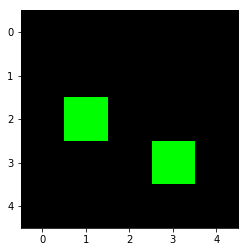

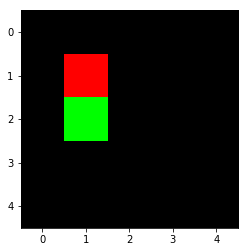

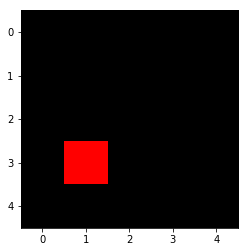

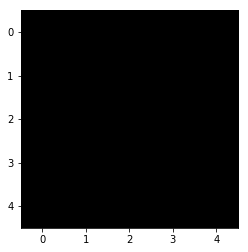

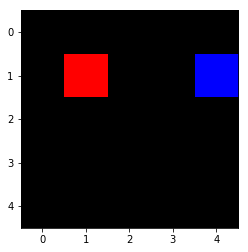

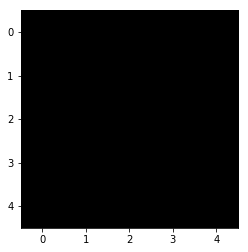

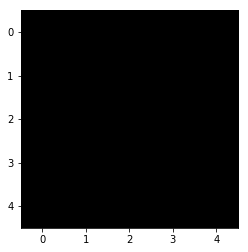

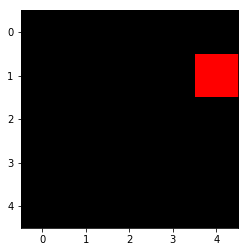

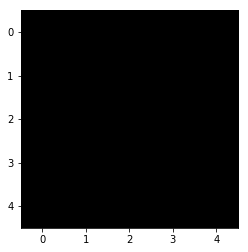

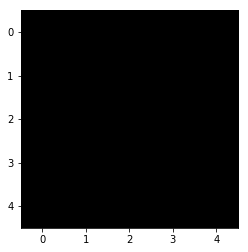

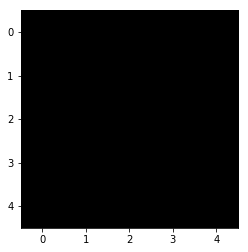

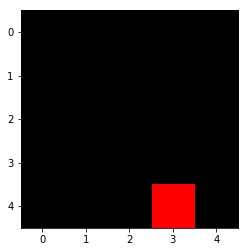

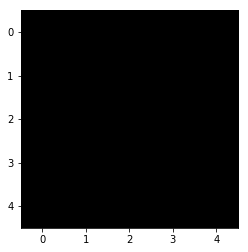

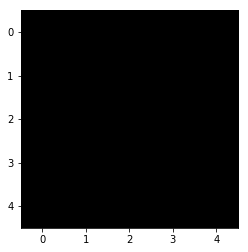

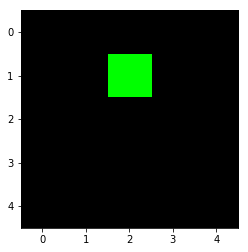

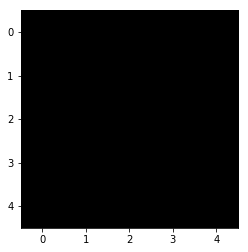

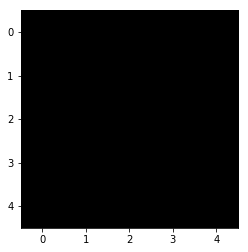

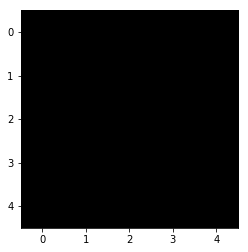

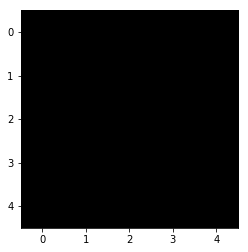

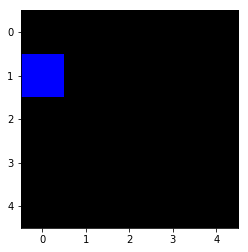

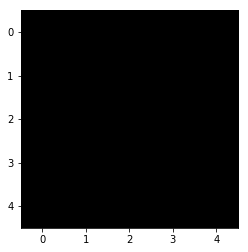

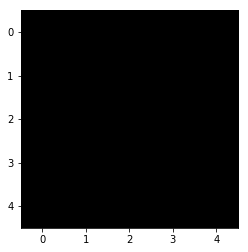

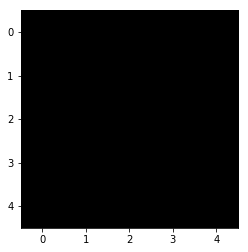

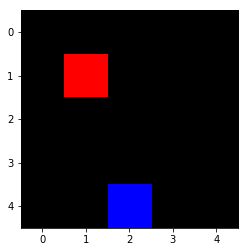

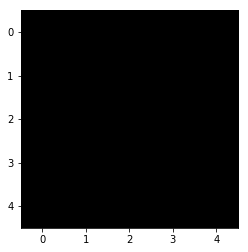

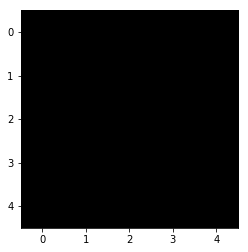

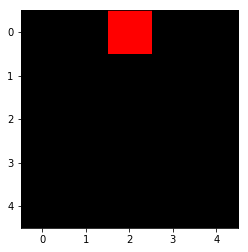

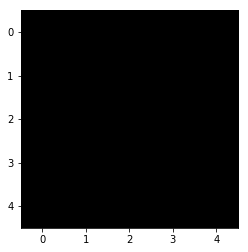

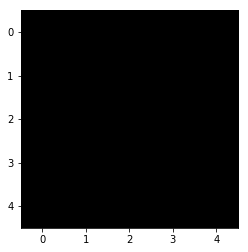

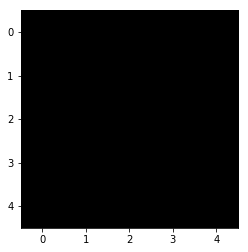

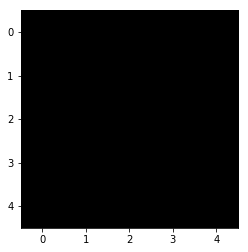

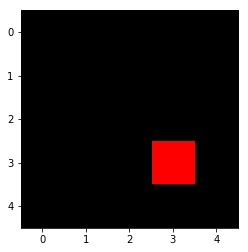

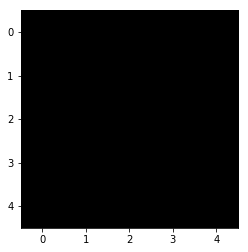

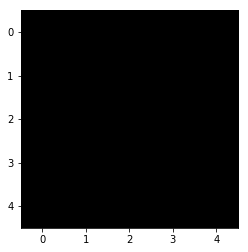

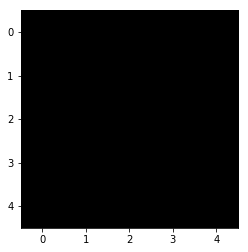

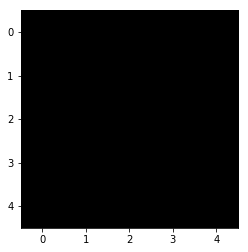

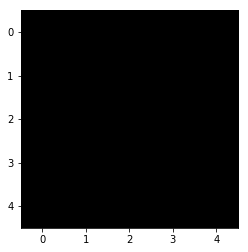

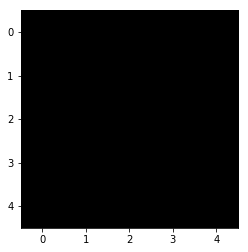

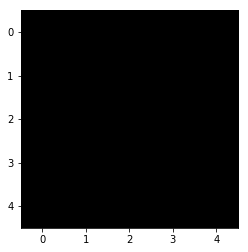

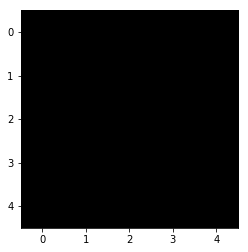

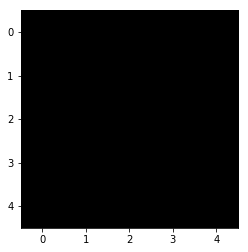

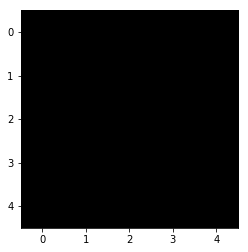

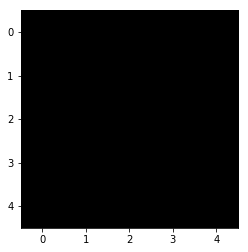

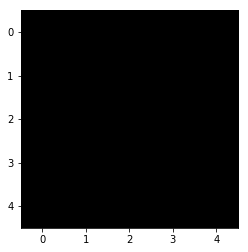

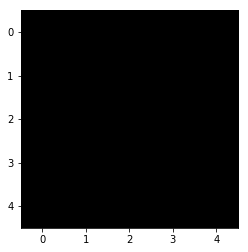

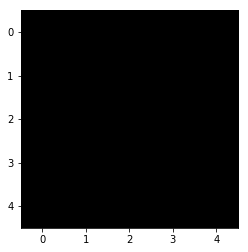

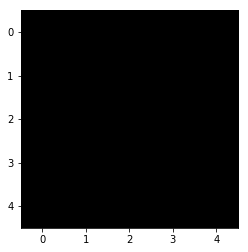

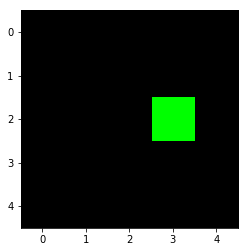

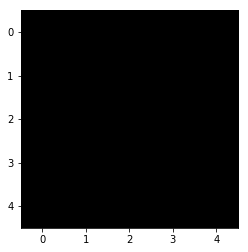

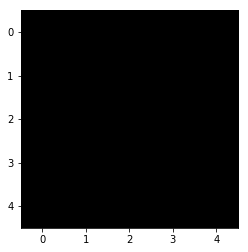

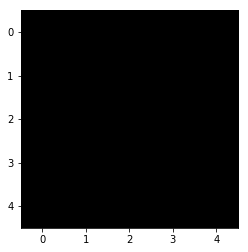

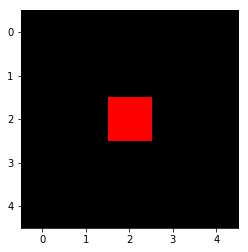

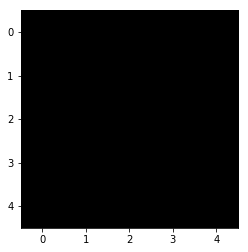

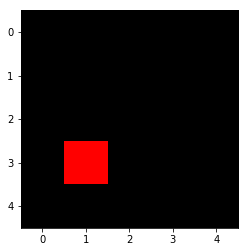

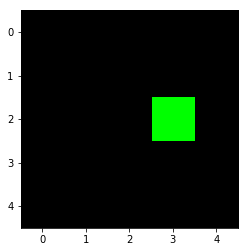

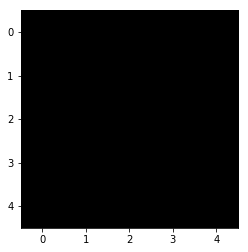

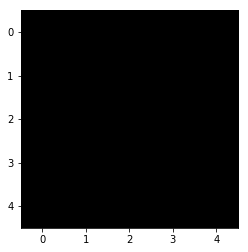

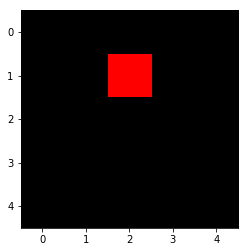

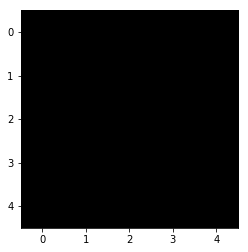

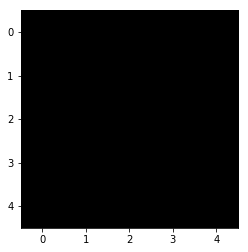

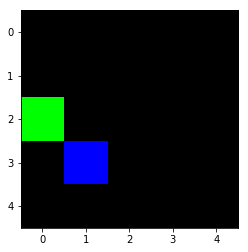

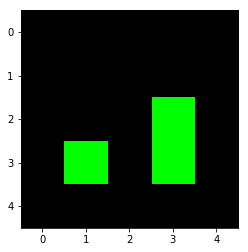

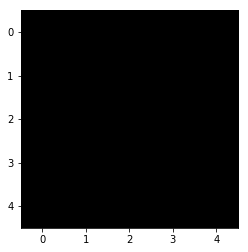

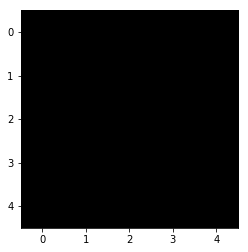

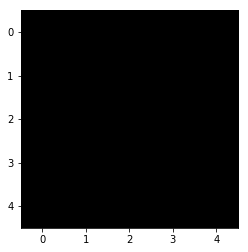

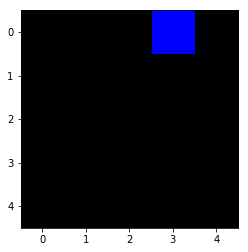

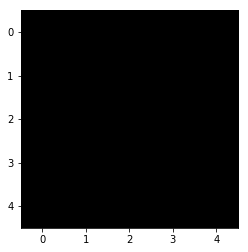

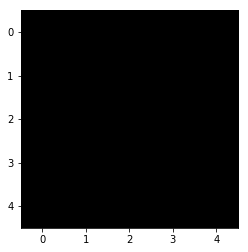

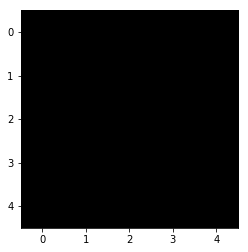

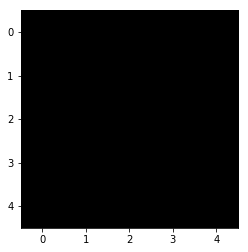

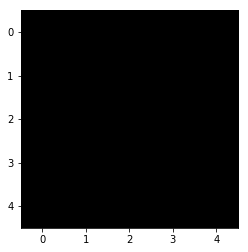

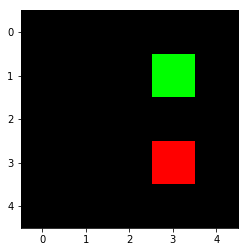

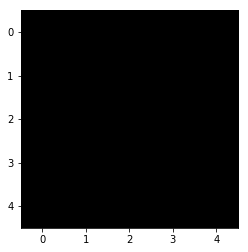

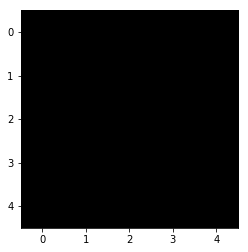

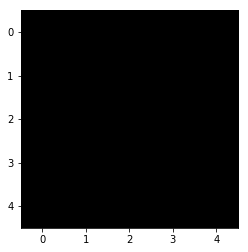

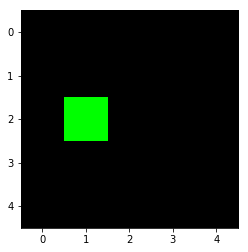

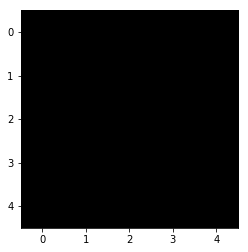

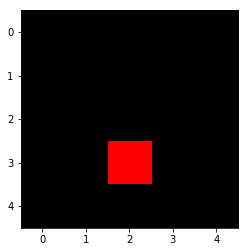

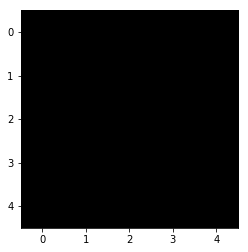

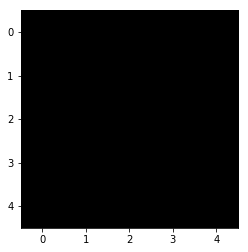

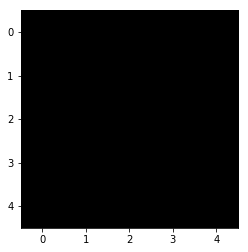

In [5]:
for i in range(192):
    plt.imshow(c[i])
    pylab.show()

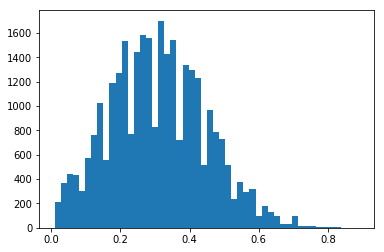

In [9]:
n, bins, patches = plt.hist(a[:,1],50,histtype='bar')

In [13]:
print(b.mean())
print(b.var())

0.2975953776041678
0.022073706723425117
